Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
# Your name here
NAME = "John Ortiz"
# list collaborators separated by commas
COLLABORATORS = "N/a"

In [2]:
## Adding a check for version
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

# Problem 1 (Sudoku Solver)

The purpose of this problem is to explore state space search for solving Sudoku and trying to make the search more efficient. 

Recall that in Sudoku, we have a 9x9 grid divided into blocks, wherein each **block** has 3x3 cells. Here is an example below.
<div>
 <img src="sudoku_and_solution.png", width="300">
</div>

- We number the rows of the sudoku grid from 1 to 9, and likewise, the columns from 1 to 9.
- We will refer to a cell by `(row_number, column_number)`.
- We also divide up the grid into 3x3 __blocks__ 
- For convenience we give the blocks coordinates (1,1), (2,1), (3,1) ... (3,3) as shown below.

<div>
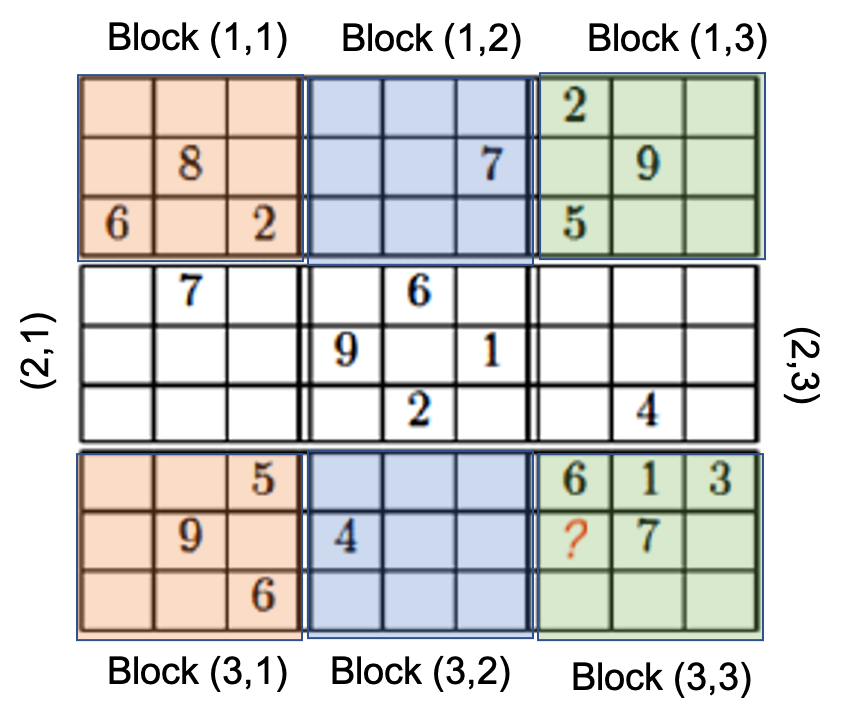
</div>

Example: block (2,1) refers to the set of cells: { (4,1), (5,1), (6,1), (4,2), (5,2), (6,2), (4,3), (5,3), (6,3) } .

## Assignment at a Glance

Detailed instructions are provided below. This is just a brief summary of this assignment.

#### DO NOT PANIC!!! :-)

### Problem 1

Complete implementation of the `SudokuBoard` class that will help us represent and manipulate the sudoku board as part of the search.
  - Understand some of the methods we have implemented including: `get_numbers_for_row`, `get_numbers_for_col`, `get_numbers_for_block`, `has_repeated_entries`.
  - TODO: Complete missing portions for methods `is_valid`, `get_possible_fills`, and `goal_test`.
  
#### Problem 1B (not graded)
 The `SudokuBoard` class has been plugged into a `Problem` data structure we encountered in previous assignment so that you can run DFS, BFS, and IDS from the AIMA book's code repository (provided for you with this notebook).
 
You can directly run this code from this notebook and observe performance. You may have to interrupt/kill your kernel in which case please re-run the cells from start. Some of this code is commented just so that our autograder does not timeout on this notebook. You can copy them into a fresh cell to run them but please delete them when you are ready to submit.

#### Problem 1C (graded)
 
Try to explain very briefly why this search is taking so much time on "simple problems"
  
### Problem 2

You are asked to implement a simple approach based on how humans do sudoku by looking for "implied fills".
  - Read the `SudokuBoardImpliedFill` class description
  - Complete the implementation of `find_implied_fills` method.
  
#### Problem 2B (Not Graded) 
 Run sudoku on examples and note the  running times. This is just FYI and not graded.
 
#### Problem 2C  (Graded)
Try some problems that you create or find on the internet. Examine the sudoku problem text files and examples in problem 2B to see how we run search. Record some of your observations.

### Extra Credit

This assignment is more challenging than the previous one. But if you are a glutton for punishment and  you have time you can try this. _We will not give out extra credit easily_ but do not let that discourage you ;-) Do extra credit only after all regular credit problems are done please. Also, no help will be provided or at least we will prioritize other students who need help with regular assignment.


The constraints for solving a puzzle are as follows:
  - Every grid cell must have a number between 1-9 in it.
  - A number must occur exactly once in each row.
  - A number must occur exactly once in each column.
  - A number must occur exactly once in each block.

See here for more information: https://en.wikipedia.org/wiki/Sudoku


## Problem 1A (35 points): Naively Define the Sudoku Problem

We will first look at a naive definition of the Sudoku problem using the problem representation class from the AIMA code repository, recalled below.

In [2]:
from search import Problem
# See problem class defined in search.py
# you already encountered it in assignment 1
# Since we will not be modifying it, 
# we have placed it in a separate file.

In [3]:
# Class: SudokuBoard
# This is the main class we will implement for this problem.
# In this class, we will define the basic functionality of 
# the sudoku board and functions for manipulating it.
# Please complete the missing functions below. 

class SudokuBoard:
    
    # The class SudokuBoard has a single field 
    #  self.contents : A dictionary from (i,j) -> k
    #     the dictionary indicates that cell (i,j) has number k
    #     Empty cells are not present in the self.contents field.
    
    # Constructor: DO NOT MODIFY
    def __init__(self, filled_cells_dict):
        self.contents = filled_cells_dict
        
    # A pretty printer that will come in handy later
    # This will print the sudoku board in a nice readable format.
    # DO NOT MODIFY
    def pretty_print(self):
        state = self.contents
        # Iterate through each row
        blk_sep = '|' + '-'*9 + '+' + '-'*9 +  '+' +  '-'*9  + '|'
        print(blk_sep)
        for row_id in range(1,10): 
            # Iterate through each column
            row_str = '|'
            for col_id in range(1,10):
                # If row is not empty
                if (row_id, col_id) in state:
                    row_str = row_str + ' '+str(state[(row_id, col_id)]) + ' '
                else:
                    row_str = row_str + '   '
                if col_id % 3 == 0:
                    row_str = row_str + '|'
            print(row_str)
            if row_id %3 == 0:
                print(blk_sep)
    
    # Function: get_numbers_for_row
    # Return a list of all the numbers tha are currently
    # in row number j. Where 1 <= j <= 9
    # DO NOT MODIFY
    def get_numbers_for_row(self, j):
        assert(j >= 1 and j <= 9)
        state = self.contents
        row_nums = [state[(j,k)] 
                    for k in range(1,10)
                    if (j,k) in state.keys() ]
        return row_nums
    
    # Function: get_numbers_for_col
    # Return a list of all the numbers that are currently
    # in column number j. Where 1 <= j <= 9
    # DO NOT MODIFY
    def get_numbers_for_col(self, j):
        assert(j >= 1 and j <= 9)
        state = self.contents
        col_nums = [state[(k,j)] 
                    for k in range(1,10)
                    if (k,j) in state.keys() ]
        return col_nums
    
    # Function: get_numbers_for_block
    # Return a list of all the numbers that are currently
    # in the block blk_x, blk_y
    # DO NOT MODIFY
    def get_numbers_for_block(self, blk_x, blk_y):
        assert( 1 <= blk_x <= 3)
        assert( 1 <= blk_y <= 3)
        state = self.contents
        row_nums = [ state[(j,k)] 
                    for j in range(blk_x*3-2, blk_x*3+1)
                    for k in range(blk_y*3-2, blk_y*3+1)
                    if (j,k) in state.keys() ]
        return row_nums
    
    
    # Function: has_repeated_entries
    # Check if a list of numbers has at least one number
    # that repeats (more than once).
    # return False if all elements are unique
    # return True if some element is repeated
    # DO NOT MODIFY
    def has_repeated_entries(self, lst_of_numbers):
        if len(lst_of_numbers) == len(set(lst_of_numbers)):
            return False
        else:
            return True
    
    # Function: is_valid
    # Write a function that checks that
    #  - Each row/column/block has no more than one 
    #      occurrence of number 1 - 9
    #  - We have a flag called verbose that you can 
    #      use to print a message if you wish or simply ignore it.
    #    Our test cases will be calling with verbose = True 
    #    that way you can see what is happening/debug better
    #    if you place print statements protected by if (verbose)
    #    But the search will call with verbose = False.
    #  Return TRUE if no repetition is seen in the board.
    #  Return FALSE if a number has repeated in row, column or block.
    # TODO: Complete implementation of this function.
    def is_valid(self, verbose=False):
        # Use the functions
        #  self.get_numbers_for_row
        #  self.get_numbers_for_col
        #  self.get_numbers_for_block
        #  self.has_repeated_entries
        # YOUR CODE HERE
        #for each row (1-9)
        for i in range(1,10):
            rowArr = self.get_numbers_for_row(i)
            colArr = self.get_numbers_for_col(i)
            
            if(self.has_repeated_entries(rowArr)):
                return False
            if(self.has_repeated_entries(colArr)):
                return False
        for i in range(1,4):
            for j in range(1,4):
                blockArr = self.get_numbers_for_block(i,j)
                if(self.has_repeated_entries(blockArr)):
                    return False
        return True
            
        #raise NotImplementedError()
        
    # Function: get_block_number
    # Useful function to find out which block (i,j) belongs to.
    # DO NOT MODIFY
    def get_block_number(self, i, j):
        return ((i-1)//3 + 1, (j-1)//3 + 1)
    
    # Function: get_possible_fills
    # Return a list (i, j, k) of all possible "fills"
    #   I.e, we can fill cell (i,j) with number k
    # Note that for same cell (i,j) there are many possible ks that can 
    # be filled. Each such possibility will have a separate
    #  (i,j,k) entry.
    #
    #   (a) You must ensure that (i,j) is not filled in the current board.
    #   (b) You must ensure that k does not occur elsewhere in 
    #      - row i
    #      - column j
    #      - 3x3 block in which (i,j) is located.
    #      Useful functions: 
    #        self.get_block_number
    #        self.get_numbers_for_row 
    #        self.get_numbers_for_col 
    #        self.get_numbers_for_block
    # TODO: Complete the missing parts below.
    # This function 
    def get_possible_fills(self):
        state = self.contents # state is a dictionary mapping (x,y) cell coordinate to number
        # First get a list of cells that are not filled
        lst_of_unfilled_cells = [ (i,j) 
                           for i in range(1, 10) 
                           for j in range(1, 10) 
                           if (i,j) not in state.keys()]
       
        # 2. For each unfilled cell get all the valid_actions for that cell
        valid_actions = [] # add (i,j,k) to valid_actions 
                           #   if (i,j) isunfilled and k is a number between 1 to 9
                           #   and k does not occur in row i, column j, or block corr. to (i,j)
        for (i,j) in lst_of_unfilled_cells:
            # YOUR CODE HERE
            #check if i,j is filled
            assert((i,j) not in self.contents.keys())
            #k does not occur else where(row[i],col[j],block)
            for k in range(1,10):
                #testState =self.contents
                #for row
                rowArr =self.get_numbers_for_row(i)
                rowArr.append(k)
                vibeCheck = True
                if(self.has_repeated_entries(rowArr)):
                    vibeCheck= False
                #for col
                colArr =self.get_numbers_for_col(j)
                colArr.append(k)
                if(self.has_repeated_entries(colArr)):
                    vibeCheck= False
                #for block
                blockNum = self.get_block_number(i,j)
                #print("________________________")
                #print(blockNum)
                blockArr =self.get_numbers_for_block(blockNum[0],blockNum[1])
                blockArr.append(k)
                if(self.has_repeated_entries(blockArr)):
                    vibeCheck= False
                if(vibeCheck):
                    valid_actions.append((i,j,k))
                
            #raise NotImplementedError()
        return valid_actions
    
    # Function: fill_up
    # fill up cell (i,j) with k
    # return a new Board with same as current board
    #  but cell (i,j) has number k.
    # DO NOT MODIFY
    def fill_up(self, i, j, k):
        assert((i,j) not in self.contents.keys())
        # Let us copy the dictionary over.
        new_state = self.contents.copy()
        assert (1 <= i <= 9 and 1 <= j <= 9 and 1 <= k <= 9)
        # Assign cell (i,j) to number k
        new_state[(i,j)] = k
        # Return a SudokuBoard structure
        return SudokuBoard(new_state)
    
    # Function: goal_test
    #  Check if the current board has been fully filled
    #  and in a valid manner.
    # TODO: Complete missing portions
    def goal_test(self):
        state = self.contents
        if not self.is_valid():
            return False
        # Check that all the cells are filled
        # I.e, for each i in 1..9 and for each j in 1..9, 
        #      check that (i,j) is in the dictionary
        #      check that state[(i,j)] is between 1 and 9
        # The rest of the task is already achieved by call to is_valid above.
        # YOUR CODE HERE
        for i in range(1,10):
            for j in range(1,10):
                if((i,j) not in self.contents.keys()):
                    return False
                if((state[(i,j)] <1) or (state[(i,j)] >9) ):
                    return False
                
        #raise NotImplementedError()
        return True
        
    # Define a hash function
    # This is for the search algorithms later. 
    # do not modify.
    def __hash__(self):
        cells_lst = [(i,j,k) for ((i,j),k) in self.contents.items()]
        return hash(frozenset(cells_lst))
    

In [4]:
# Run this cell: It uses the SudokuBoard class to 
# implement a search problem. 
# DO NOT MODIFY
class SudokuProblemClass(Problem):
    
    def __init__(self, filled_initial_cells):
        """ Constructor: filled_initial_cells is a dictionary
                        specifying which cells are already filled.
        """
        super().__init__(SudokuBoard(filled_initial_cells))
  
    def actions(self, state):
        # Define all possible actions from the given state.    
        if not state.is_valid():
            return [] # no actions
        return state.get_possible_fills()
              
    def result(self, state, action):
        (i,j,k) = action
        return state.fill_up(i,j,k)
    
    def goal_test(self, state):
        return state.goal_test()

    def path_cost(self, c, state1, action, state2):
        return 1

## This is a very useful utility function for us
def read_sudoku_problem(filename):
    state = {}
    with open(filename, 'r') as file:
        row_id = 1
        for rows in file:
            rows = rows.strip()
            cont_list = [char for char in rows]
            for (col_id, row_contents) in enumerate(cont_list):
                row_contents = row_contents.strip()
                if '1' <= row_contents <= '9':
                    state[(row_id, col_id+1)] = int(row_contents)
            row_id = row_id + 1
        file.close()
    return state

In [5]:
# Test cases for is_valid
### BEGIN TESTS
b = SudokuBoard(read_sudoku_problem('sudoku_test1.txt'))
print('Test # 1 : Valid Board')
b.pretty_print()
assert(b.is_valid())
print('Passed.')

state1 = b.contents
state1[(8,1)] = 8
print('Test # 2: Invalid Board (repeated entry in row 8)')
b0 = SudokuBoard(state1)
b0.pretty_print()
assert(not b0.is_valid(True))
print('Passed.')

print('Test # 3: Invalid Board (Repeated entry in col: 1)')
b1 = SudokuBoard(read_sudoku_problem('sudoku_validity_test1.txt'))
b1.pretty_print()
assert(not b1.is_valid(True))
print('Passed.')

print('Test # 4: Invalid Board (Repeated in block: 2, 3)')
b2 = SudokuBoard(read_sudoku_problem('sudoku_validity_test2.txt'))
b2.pretty_print()
assert(not b2.is_valid(True))
print('Passed.')

print('Test # 5: Invalid Board (Repeated entry in row: 3)')
b3 = SudokuBoard(read_sudoku_problem('sudoku_validity_test3.txt'))
b3.pretty_print()
assert(not b3.is_valid(True))
print('Passed')

print('Test # 6: Valid Board')
b4 = SudokuBoard(read_sudoku_problem('sudoku_validity_test4.txt'))
b4.pretty_print()
assert(b4.is_valid())
print('Passed.')

print('Test # 7: Invalid Board (Repeated Entry in Row 4)')
b5 = SudokuBoard(read_sudoku_problem('sudoku_validity_test5.txt'))
b5.pretty_print()
assert(not b5.is_valid())
print('All tests passed. 10 points')
### END TESTS

Test # 1 : Valid Board
|---------+---------+---------|
| 9       | 6  1  3 | 2  8  4 |
| 4  8  3 | 2  5    | 1  9  6 |
| 6  1  2 | 8  4    |         |
|---------+---------+---------|
| 1  7  8 | 3  6  4 |         |
| 5  2  4 | 9       | 3  6  8 |
| 3  6  9 | 5  2  8 | 7  4  1 |
|---------+---------+---------|
|       5 | 7     2 | 6  1  3 |
|         | 4  3  6 | 8  7    |
| 7  3    | 1  8  5 |    2  9 |
|---------+---------+---------|
Passed.
Test # 2: Invalid Board (repeated entry in row 8)
|---------+---------+---------|
| 9       | 6  1  3 | 2  8  4 |
| 4  8  3 | 2  5    | 1  9  6 |
| 6  1  2 | 8  4    |         |
|---------+---------+---------|
| 1  7  8 | 3  6  4 |         |
| 5  2  4 | 9       | 3  6  8 |
| 3  6  9 | 5  2  8 | 7  4  1 |
|---------+---------+---------|
|       5 | 7     2 | 6  1  3 |
| 8       | 4  3  6 | 8  7    |
| 7  3    | 1  8  5 |    2  9 |
|---------+---------+---------|
Passed.
Test # 3: Invalid Board (Repeated entry in col: 1)
|---------+---------+-------

In [6]:
# Test cases for get_possible_fills
### BEGIN TESTS
b = SudokuBoard(read_sudoku_problem('sudoku_fill_test_1.txt'))
b.pretty_print()
lst = b.get_possible_fills()
print('Your code returned: ' , lst)
assert((3,7,5) in lst), 'Fail: position (3,7) can be filled with 5'
assert((3,8,1) in lst), 'Fail: position (3,8) can be filled with 1'
assert((3,9,6) in lst), 'Fail: position (3,9) can be filled with 6'
assert(len(lst) == 3), 'Fail: there are precisely three possible places to fill'
print('Passed  test! 5 points.')
### END TESTS

|---------+---------+---------|
| 9  4  6 | 1  5  3 | 8  2  7 |
| 5  8  1 | 7  2  6 | 4  9  3 |
| 7  3  2 | 8  4  9 |         |
|---------+---------+---------|
| 6  2  8 | 3  9  5 | 7  4  1 |
| 1  5  4 | 6  7  2 | 9  3  8 |
| 3  7  9 | 4  1  8 | 2  6  5 |
|---------+---------+---------|
| 2  1  5 | 9  3  7 | 6  8  4 |
| 8  9  3 | 5  6  4 | 1  7  2 |
| 4  6  7 | 2  8  1 | 3  5  9 |
|---------+---------+---------|
Your code returned:  [(3, 7, 5), (3, 8, 1), (3, 9, 6)]
Passed  test! 5 points.


In [7]:
### BEGIN TESTS
b = SudokuBoard(read_sudoku_problem('sudoku_fill_test_2.txt'))
b.pretty_print()
lst = b.get_possible_fills()
print(lst)
expected_lst = [(1, 1, 9), (4, 3, 8), 
                (5, 4, 6), (6, 2, 7), (6, 7, 2), 
                (8, 3, 3), (9, 1, 4)]

for elt in expected_lst:
    assert (elt in lst) , 'Error: expected entry %s is missing' % (str(elt))

for elt in lst:
    assert (elt in expected_lst), 'Error: entry %s is missing' % (str(elt))

    
print('All Tests Passed: 5 points.')

### END TESTS

|---------+---------+---------|
|    4  6 | 1  5  3 | 8  2  7 |
| 5  8  1 | 7  2  6 | 4  9  3 |
| 7  3  2 | 8  4  9 | 5  1  6 |
|---------+---------+---------|
| 6  2    | 3  9  5 | 7  4  1 |
| 1  5  4 |    7  2 | 9  3  8 |
| 3     9 | 4  1  8 |    6  5 |
|---------+---------+---------|
| 2  1  5 | 9  3  7 | 6  8  4 |
| 8  9    | 5  6  4 | 1  7  2 |
|    6  7 | 2  8  1 | 3  5  9 |
|---------+---------+---------|
[(1, 1, 9), (4, 3, 8), (5, 4, 6), (6, 2, 7), (6, 7, 2), (8, 3, 3), (9, 1, 4)]
All Tests Passed: 5 points.


In [8]:
# Test cases for get_possible_fills
### BEGIN TESTS
b = SudokuBoard(read_sudoku_problem('sudoku_test1.txt'))
b.pretty_print()
lst = b.get_possible_fills()
expected_lst = [(1, 2, 5), (1, 3, 7), (2, 6, 7), (3, 6, 7), 
                (3, 6, 9), (3, 7, 5), (3, 8, 3), (3, 8, 5), 
                (3, 9, 5), (3, 9, 7), (4, 7, 5), (4, 7, 9), 
                (4, 8, 5), (4, 9, 2), (4, 9, 5), (5, 5, 7), 
                (5, 6, 1), (5, 6, 7), (7, 1, 8), (7, 2, 4), 
                (7, 2, 9), (7, 5, 9), (8, 1, 2), (8, 2, 9), 
                (8, 3, 1), (8, 9, 5), (9, 3, 6), (9, 7, 4)]
for elt in expected_lst:
    assert (elt in lst) , 'Error: expected entry %s is missing' % (str(elt))

for elt in lst:
    assert (elt in expected_lst), 'Error: entry %s is missing' % (str(elt))

    
print('All Tests Passed: 5 points')

### END TESTS

|---------+---------+---------|
| 9       | 6  1  3 | 2  8  4 |
| 4  8  3 | 2  5    | 1  9  6 |
| 6  1  2 | 8  4    |         |
|---------+---------+---------|
| 1  7  8 | 3  6  4 |         |
| 5  2  4 | 9       | 3  6  8 |
| 3  6  9 | 5  2  8 | 7  4  1 |
|---------+---------+---------|
|       5 | 7     2 | 6  1  3 |
|         | 4  3  6 | 8  7    |
| 7  3    | 1  8  5 |    2  9 |
|---------+---------+---------|
All Tests Passed: 5 points


In [9]:
### Test Cases for Goal Test
print('Test 1 (not a goal state)')
b = SudokuBoard(read_sudoku_problem('sudoku_test1.txt'))
b.pretty_print()
assert(not b.goal_test())

print('Test 2 (goal state)')
b2 = SudokuBoard(read_sudoku_problem('sudoku_goal_test1.txt'))
b2.pretty_print()
assert(b2.goal_test())

print('Test 3 (not a goal state)')
b3 = SudokuBoard(read_sudoku_problem('sudoku_goal_test2.txt'))
b3.pretty_print()
assert(not b3.goal_test())

print('Tests passed: 10 points')
### End Tests

Test 1 (not a goal state)
|---------+---------+---------|
| 9       | 6  1  3 | 2  8  4 |
| 4  8  3 | 2  5    | 1  9  6 |
| 6  1  2 | 8  4    |         |
|---------+---------+---------|
| 1  7  8 | 3  6  4 |         |
| 5  2  4 | 9       | 3  6  8 |
| 3  6  9 | 5  2  8 | 7  4  1 |
|---------+---------+---------|
|       5 | 7     2 | 6  1  3 |
|         | 4  3  6 | 8  7    |
| 7  3    | 1  8  5 |    2  9 |
|---------+---------+---------|
Test 2 (goal state)
|---------+---------+---------|
| 9  4  6 | 1  5  3 | 8  2  7 |
| 5  8  1 | 7  2  6 | 4  9  3 |
| 7  3  2 | 8  4  9 | 5  1  6 |
|---------+---------+---------|
| 6  2  8 | 3  9  5 | 7  4  1 |
| 1  5  4 | 6  7  2 | 9  3  8 |
| 3  7  9 | 4  1  8 | 2  6  5 |
|---------+---------+---------|
| 2  1  5 | 9  3  7 | 6  8  4 |
| 8  9  3 | 5  6  4 | 1  7  2 |
| 4  6  7 | 2  8  1 | 3  5  9 |
|---------+---------+---------|
Test 3 (not a goal state)
|---------+---------+---------|
| 9  4  6 | 1  5  3 | 8  2  7 |
| 5  8  1 | 7  2  6 | 4  9  3 |


## Problem 1(B) - Run search on some sudoku problems (0 points)

Unfortunately, setting up the search in this manner fails to solve even the simplest of problems in a reasonable amount of time. We encourage you to try this out for your own information but there is no grading component to this part.

In [10]:
from node import Node
from search_algorithms import breadth_first_tree_search, depth_first_tree_search, iterative_deepening_search

In [11]:
# Simple test problem from file sudoku_test1.txt
# This sudoku has 19 cells unfilled.
# Try to run this cell
# WARNING: It may take a long time. 
# Remember to Abort it in 2-3 minutes lest 
# your applications slow ddown considerably.

b0 = read_sudoku_problem('sudoku_test1.txt')
sudoku0 = SudokuProblemClass(b0)
print('Solving \"simple\" sudoku # 1 ')
sudoku0.initial.pretty_print()
print('Running Iterative Deepening Search: Not expected to finish.')
# Cut and paste this into a fresh cell below and uncomment these
# lines to run. It will take a long time however.
# result = iterative_deepening_search(sudoku0)
# print(result)

Solving "simple" sudoku # 1 
|---------+---------+---------|
| 9       | 6  1  3 | 2  8  4 |
| 4  8  3 | 2  5    | 1  9  6 |
| 6  1  2 | 8  4    |         |
|---------+---------+---------|
| 1  7  8 | 3  6  4 |         |
| 5  2  4 | 9       | 3  6  8 |
| 3  6  9 | 5  2  8 | 7  4  1 |
|---------+---------+---------|
|       5 | 7     2 | 6  1  3 |
|         | 4  3  6 | 8  7    |
| 7  3    | 1  8  5 |    2  9 |
|---------+---------+---------|
Running Iterative Deepening Search: Not expected to finish.


In [12]:
# This sudoku problem has 61 cells unfilled.
# WARNING: It may take a long time. 
# Remember to Abort it in 2-3 minutes lest 
# your applications slow ddown considerably.
sudoku1 = SudokuProblemClass( { (1,3):6, (2,2):8, (2,4):7, 
                               (2,8):9, (3,3):2, (3,7):5, 
                               (3,9):6,  (4,5):9, (4,8): 4, 
                               (5,4): 6, (5,6): 2, (6,2):7, 
                               (6,5): 1,(7,1): 2, (7,3): 5, 
                               (7,7): 6, (8,2): 9, (8,6): 4, 
                               (8,8): 7, (9,7): 3} )
sudoku1.initial.pretty_print()
# Cut and paste this into a fresh cell below and uncomment these
# lines to run. It will take a long time however.
#result = iterative_deepening_search(sudoku1)
# print(result)

|---------+---------+---------|
|       6 |         |         |
|    8    | 7       |    9    |
|       2 |         | 5     6 |
|---------+---------+---------|
|         |    9    |    4    |
|         | 6     2 |         |
|    7    |    1    |         |
|---------+---------+---------|
| 2     5 |         | 6       |
|    9    |       4 |    7    |
|         |         | 3       |
|---------+---------+---------|


## Problem 1C (5 points)

Explain briefly your experience why search takes so long to run for our Sudoku problem (4-5 lines maximum).

 - Explain what is the search depth to find a goal in terms of number of unfilled cells at start.
 - Explain what the branching factor would be in the worst case.

The search depth would be equal to the amount of unfilled cells. This is because the search algorithm goes by each empty cell and brute forces k. Sudoku has a time complexity of $b^{d+1}$. And with a branching factor at worst case would be 9. Hence we have lets say 61 unfilled cells, the time complexity yields $61^10$, which is huge!!!

## Problem 2: A Better Search Strategy 

As you noticed, the search above fails to find a solution for the problems. We will propose an improvement to the way we search based on __how people play Sudoku__.

###  Implied Moves 

The first improvement consists of looking at all __implied moves__ for the current sudoku board.

### Example

Consider the example below focusing on cell (8,7) labeled by a red ?.

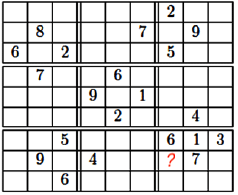

Using a process of elimination, we note that the only possibility for that square is an `8` (convince yourself of this fact).

Rather than  waiting for one more step of search to fill it in, we propose to automatically fill in a board with all these
implied moves.

## Problem 2(A) Implement Implied Fill (25 points)

We will now ask you to complete the implementation of the function `find_implied_fills`:
  - Iterate through all the cells (i,j) that are not currently filled.
    - Compute a list of possible numbers that can be part of that cell (i,j) by considering 
      the list of numbers already in row i, column j and block corresponding to i,j
    - If this list just has one element k, append (i,j,k) to the output list that we will eventually return. 
      - This signifies that for cell (i,j) we only have the choice of filling it with the number k.
    - If this list is empty, the state has a conflict. I.e, there is no possible solution that can fill cell (i,j). Record this in a flag `self.has_conflict` and exit.
      - In this situation it does not matter what list you return as long as you have set `self.has_conflict` to true.
      
Also, note that in some situation, we can keep repeating the process again and again since filling in  a cell with an implied number can now enable other cells to be filled up. We have implemented this for you in the function `do_all_implied_fills`.

In [13]:
class SudokuBoardImpliedFill(SudokuBoard):
    
    def __init__(self, filled_cells_dict, do_implied_fills=True):
        super().__init__(filled_cells_dict)
        self.has_conflict = False
        if do_implied_fills:
            self.do_all_implied_fills(False)
        
    def get_block_number(self, i, j):
        return ((i-1)//3 + 1, (j-1)//3 + 1)
         
    def find_implied_fills(self, verbose=False):
        # This function should return a list 
        #     [(i,j,k) s.t. k is the only possible fill for (i,j)]
        # As described in the writeup above, if it finds a conflict,
        #  then it must set the flag self.has_conflict = True
        #  In the case of conflict you may just return the empty list.
        # Any debug messages you print must first check if verbose flag
        # is set to true.
        # Or you can just ignore the verbose flag, 
        # and not print anything from the function.
        
        state = self.contents #dictionary representing the board
        implied_fill_list = [] # initialize the list we will return
        # find all cells that are not filled yet
        unfilled_cells = [(i,j) 
                          for i in range(1,10) 
                          for j in range(1,10) 
                          if (i,j) not in state.keys()]
        # for each unfilled cell, 
        #    compute list of possible fills
        #    if list is a singleton, then append it to implied_fill_list
        #    if list is empty, set has_conflict to True (and return the empty list)
        # return implied_fill_list
        # YOUR CODE HERE
        for (i,j) in unfilled_cells:
            #create list of possible fills
            kArr=[]
            for k in range(1,10):
                kArr.append(k) 
            #if()
             #for row
            rowArr =self.get_numbers_for_row(i)
            #for col
            colArr =self.get_numbers_for_col(j)
            #for block
            blockNum = self.get_block_number(i,j)
            blockArr =self.get_numbers_for_block(blockNum[0],blockNum[1])
            
            for k in range(0,9):
                for x in range(len(rowArr)):
                    if(kArr[k]==rowArr[x]):
                        #means k is no longer a valid option
                        #break out of this for loop
                        kArr[k]= -1
                        break
                for x in range(len(colArr)):
                    if(kArr[k]==colArr[x]):
                        kArr[k]= -1
                        break
                for x in range(len(blockArr)):
                    if(kArr[k]==blockArr[x]):
                        kArr[k]= -1
                        break
            # rowArr[k] -1 = index to change
            #for x in range(len(rowArr)):
            #    if(kArr[k])
            #    if(kArr[k]==rowArr[k]):
            #        kArr[k]= -1
            #    elif(kArr[k]==colArr[k]):
            #        kArr[k]= -1
            #    elif(kArr[k]==blockArr[k]):
            #        kArr[k]= -1
            coolArr=[]
            for k in range(len(kArr)):
                if(kArr[k] >0):
                    coolArr.append(kArr[k])
            if(len(coolArr)==0):
                #conflict
                self.has_conflict = True
                return []
            elif(len(coolArr)==1):
                #singleton
                implied_fill_list.append((i,j,coolArr[0])) 
            
        
            #implied_fill_list.append((i,j,k))
            #raise NotImplementedError()
        return implied_fill_list
    
    # Function: do_all_implied_fills
    # repeatedly find implied fills and perform them.
    # keep finding new implied fills until no more are left.
    # DO NOT MODIFY
    def do_all_implied_fills(self, verbose=False):
        done = False
        state = self.contents
        while (not done and not self.has_conflict):
            lst = self.find_implied_fills(verbose)
            if len(lst) == 0:
                done = True
            else:
                for (i,j,k) in lst:
                    state[(i,j)] = k
        return
    
    def is_valid(self, verbose=False):
        return not(self.has_conflict) and super().is_valid(verbose)
    
    def fill_up(self, i, j, k):
        # fill up cell (i,j) with k
        # return a new Board
        new_state = self.contents.copy()
        assert (1 <= i <= 9 and 1 <= j <= 9 and 1 <= k <= 9)
        new_state[(i,j)] = k
        return SudokuBoardImpliedFill(new_state)
    
## This is a very useful utility function for us
def read_sudoku_problem(filename):
    state = {}
    with open(filename, 'r') as file:
        row_id = 1
        for rows in file:
            rows = rows.strip()
            cont_list = [char for char in rows]
            for (col_id, row_contents) in enumerate(cont_list):
                row_contents = row_contents.strip()
                if '1' <= row_contents <= '9':
                    state[(row_id, col_id+1)] = int(row_contents)
            row_id = row_id + 1
        file.close()
    return state

In [14]:
# BEGIN TESTS
print('=========== Test 1A ==============')
state = read_sudoku_problem('sudoku_implied_fill_test1.txt')
print('Original Problem')
prob = SudokuBoardImpliedFill(state, False)
prob.pretty_print()
lst = prob.find_implied_fills(True)
print('Implied Fills (round 1): ', lst)
print('Implied Fills (round 1 expected answer)', [(8,7,8)])
assert(len(lst) == 1) , "There must be just one implied fill"
assert (lst[0] == (8,7,8)), "Only implied fill is at location (8,7) fill number 8"
assert(not prob.has_conflict) , "Implied fill does not discover a conflict in this instance"
print('Test 1A Passed')
print('')
print('')
print('=========== Test 1B ==============')

prob.contents[(8,7)] = 8 # forcibly add 8 to the position (8,7)
prob.pretty_print()
lst2 = prob.find_implied_fills(True)
assert(len(lst2) == 0), "No more implied fills can be found in this case"
assert(not prob.has_conflict), "Implied fill does not discover a conflict in this instance"
print('Test 1B Passed: 10 points')
print('')
print('')
# END TESTS

=========== Test 1A ==============
Original Problem
|---------+---------+---------|
|         |         | 2       |
|    8    |       7 |    9    |
| 6     2 |         | 5       |
|---------+---------+---------|
|    7    |    6    |         |
|         | 9     1 |         |
|         |    2    |    4    |
|---------+---------+---------|
|       5 |         | 6  1  3 |
|    9    | 4       |    7    |
|       6 |         |         |
|---------+---------+---------|
Implied Fills (round 1):  [(8, 7, 8)]
Implied Fills (round 1 expected answer) [(8, 7, 8)]
Test 1A Passed


=========== Test 1B ==============
|---------+---------+---------|
|         |         | 2       |
|    8    |       7 |    9    |
| 6     2 |         | 5       |
|---------+---------+---------|
|    7    |    6    |         |
|         | 9     1 |         |
|         |    2    |    4    |
|---------+---------+---------|
|       5 |         | 6  1  3 |
|    9    | 4       | 8  7    |
|       6 |         |         |
|-----

In [15]:
print('=========== Test 2 ==============')
state = read_sudoku_problem('sudoku_implied_fill_test2.txt')
print('Original Problem')
prob2 = SudokuBoardImpliedFill(state, False)
prob2.pretty_print()
lst2 = prob2.find_implied_fills(True)
print(lst2)
expected_fills = [(1, 2, 5), (1, 3, 7), (2, 8, 9), (6, 4, 5), (7, 1, 8), (7, 4, 7)]
for x in lst2:
    assert (x in expected_fills), "Your code returned %s as an implied fill but that is incorrect" % x

for x in expected_fills:
    assert (x in lst2), "Your code did not return %s as an implied fill" % x
print('Test 2 Passed! 5 points')

=========== Test 2 ==============
Original Problem
|---------+---------+---------|
| 9       | 6       | 2  8    |
| 4     3 |    5    | 1       |
|    1    | 8       |         |
|---------+---------+---------|
| 1  7    | 3     4 |         |
| 5       | 9       | 3  6  8 |
| 3     9 |    2    | 7     1 |
|---------+---------+---------|
|       5 |       2 | 6     3 |
|         | 4  3    | 8  7    |
| 7       | 1       |    2    |
|---------+---------+---------|
[(1, 2, 5), (1, 3, 7), (2, 8, 9), (6, 4, 5), (7, 1, 8), (7, 4, 7)]
Test 2 Passed! 5 points


In [16]:
print('=========== Test 2 ==============')
state = read_sudoku_problem('sudoku_implied_fill_test3.txt')
print('Original Problem')
prob3 = SudokuBoardImpliedFill(state, False)
assert(prob3.is_valid()), "The board is currently valid"
prob3.pretty_print()
lst3= prob3.find_implied_fills(True)
print(lst3)
assert(prob3.has_conflict) , "The implied fill process will discover that no number can be filled in at cell (6,4)"
print('Test Passed! 5 points')

=========== Test 2 ==============
Original Problem
|---------+---------+---------|
| 9       | 6       | 2  8    |
| 4     3 |    5    | 1       |
|    1    | 8       |         |
|---------+---------+---------|
| 1  7    | 3     4 |         |
| 5       | 9       | 3  6  8 |
| 3     9 |    2  5 | 7     1 |
|---------+---------+---------|
|       5 |       2 | 6     3 |
|         | 4  3    | 8  7    |
| 7       | 1       |    2    |
|---------+---------+---------|
[]
Test Passed! 5 points


In [17]:
# test that implied fills are working
print('====== Test 4 ========')
state = read_sudoku_problem('sudoku_test1.txt')
print('Original Problem')
prob = SudokuBoardImpliedFill(state, False)
prob.pretty_print()
print('After doing all implied Fills')
prob.do_all_implied_fills(True)
prob.pretty_print()
print('Problem Solved?', prob.goal_test())
assert(prob.goal_test()) , "Implied fill completely solves the problem"
print('Test 4 Passed! 5 points')

====== Test 4 ========
Original Problem
|---------+---------+---------|
| 9       | 6  1  3 | 2  8  4 |
| 4  8  3 | 2  5    | 1  9  6 |
| 6  1  2 | 8  4    |         |
|---------+---------+---------|
| 1  7  8 | 3  6  4 |         |
| 5  2  4 | 9       | 3  6  8 |
| 3  6  9 | 5  2  8 | 7  4  1 |
|---------+---------+---------|
|       5 | 7     2 | 6  1  3 |
|         | 4  3  6 | 8  7    |
| 7  3    | 1  8  5 |    2  9 |
|---------+---------+---------|
After doing all implied Fills
|---------+---------+---------|
| 9  5  7 | 6  1  3 | 2  8  4 |
| 4  8  3 | 2  5  7 | 1  9  6 |
| 6  1  2 | 8  4  9 | 5  3  7 |
|---------+---------+---------|
| 1  7  8 | 3  6  4 | 9  5  2 |
| 5  2  4 | 9  7  1 | 3  6  8 |
| 3  6  9 | 5  2  8 | 7  4  1 |
|---------+---------+---------|
| 8  4  5 | 7  9  2 | 6  1  3 |
| 2  9  1 | 4  3  6 | 8  7  5 |
| 7  3  6 | 1  8  5 | 4  2  9 |
|---------+---------+---------|
Problem Solved? True
Test 4 Passed! 5 points


## Problem 2 B: Check how search works with Implied Fill (0 points)

First we will recreate the search problem instance.

In [18]:
class SudokuProblemClassImpliedFill(Problem):
    
    # Note:
    # A state of the sudoku problem is given by a dictionary
    #  mapping coordinate (i,j) -> k
    #  in other words, at (i, j) we have the number k where
    #   1 <= i <= 9, 1 <= j <= 9 and k is between 1 and 9
    # If a coordinate has no number in it, it is simply omitted from 
    # the dictionary.
    
    def __init__(self, filled_initial_cells):
        """ Constructor: filled_initial_cells is a dictionary
                        specifying which cells are already filled.
        """
        super().__init__(SudokuBoardImpliedFill(filled_initial_cells))
  
    def actions(self, state):
        # Define all possible actions from the given state.    
        if not state.is_valid():
            return [] # no actions
        return state.get_possible_fills()
    
    
    def result(self, state, action):
        (i,j,k) = action
        return state.fill_up(i,j,k)
    
    def goal_test(self, state):
        return state.goal_test()

    def path_cost(self, c, state1, action, state2):
        return 1

### Example 1

Example from the beginning.

In [19]:
sudoku1 = SudokuProblemClassImpliedFill( { (1,3):6, (2,2):8, (2,4):7, (2,8):9, (3,3):2, (3,7):5, (3,9):6, 
                              (4,5):9, (4,8): 4, (5,4): 6, (5,6): 2, (6,2):7, (6,5): 1, 
                               (7,1): 2, (7,3): 5, (7,7): 6, (8,2): 9, (8,6): 4, (8,8): 7, 
                              (9,7): 3} )
sudoku1.initial.pretty_print()
print('Searching for a solution using iterative deepening!')
result = iterative_deepening_search(sudoku1)
print('Done already!!!')
print(result)
print('Solution')
result.state.pretty_print()

|---------+---------+---------|
|       6 |         |         |
|    8    | 7       |    9    |
|       2 |         | 5     6 |
|---------+---------+---------|
|         |    9    |    4    |
|         | 6     2 |         |
|    7    |    1    |         |
|---------+---------+---------|
| 2     5 |         | 6       |
|    9    |       4 |    7    |
|         |         | 3       |
|---------+---------+---------|
Searching for a solution using iterative deepening!
Done already!!!
<Node <__main__.SudokuBoardImpliedFill object at 0x0000021EE6A5C908>>
Solution
|---------+---------+---------|
| 9  4  6 | 1  5  3 | 8  2  7 |
| 5  8  1 | 7  2  6 | 4  9  3 |
| 7  3  2 | 8  4  9 | 5  1  6 |
|---------+---------+---------|
| 6  2  8 | 3  9  5 | 7  4  1 |
| 1  5  4 | 6  7  2 | 9  3  8 |
| 3  7  9 | 4  1  8 | 2  6  5 |
|---------+---------+---------|
| 2  1  5 | 9  3  7 | 6  8  4 |
| 8  9  3 | 5  6  4 | 1  7  2 |
| 4  6  7 | 2  8  1 | 3  5  9 |
|---------+---------+---------|


### Example 2


In [20]:
state = read_sudoku_problem('sudoku_test2.txt')
print('Original Problem')
sudoku2 = SudokuProblemClassImpliedFill(state)
sudoku2.initial.pretty_print()
print('Searching for a solution using iterative deepening!')
result2 = iterative_deepening_search(sudoku2)
print('Done !!!')
print(result2)
print('Solution')
result2.state.pretty_print()

Original Problem
|---------+---------+---------|
|         |         | 2       |
|    8    |       7 |    9    |
| 6     2 |         | 5       |
|---------+---------+---------|
|    7    |    6    |         |
|         | 9     1 |         |
|         |    2    |    4    |
|---------+---------+---------|
|       5 |         | 6     3 |
|    9    | 4       |    7    |
|       6 |         |         |
|---------+---------+---------|
Searching for a solution using iterative deepening!
Done !!!
<Node <__main__.SudokuBoardImpliedFill object at 0x0000021EE6A37D08>>
Solution
|---------+---------+---------|
| 9  5  7 | 6  1  3 | 2  8  4 |
| 4  8  3 | 2  5  7 | 1  9  6 |
| 6  1  2 | 8  4  9 | 5  3  7 |
|---------+---------+---------|
| 1  7  8 | 3  6  4 | 9  5  2 |
| 5  2  4 | 9  7  1 | 3  6  8 |
| 3  6  9 | 5  2  8 | 7  4  1 |
|---------+---------+---------|
| 8  4  5 | 7  9  2 | 6  1  3 |
| 2  9  1 | 4  3  6 | 8  7  5 |
| 7  3  6 | 1  8  5 | 4  2  9 |
|---------+---------+---------|


### Example 3

Problem taken from nytimes.com puzzle page. 

In [21]:
state = read_sudoku_problem('medium-nytimes.txt')
print('Original Problem')
sudoku2 = SudokuProblemClassImpliedFill(state)
sudoku2.initial.pretty_print()
print('Searching for a solution using iterative deepening!')
result2 = iterative_deepening_search(sudoku2)
print('Done !!!')
print(result2)
print('Solution')
result2.state.pretty_print()

Original Problem
|---------+---------+---------|
|         |         |    1  4 |
| 8  6  3 |         | 7  9    |
|         |         | 3  8    |
|---------+---------+---------|
| 2  7  8 | 4  1  9 | 6  5  3 |
| 5       |    6    |         |
|    4    |    8    |    2    |
|---------+---------+---------|
|    5    |    4    |    6  1 |
|    1    |       5 |         |
|         |         |    3    |
|---------+---------+---------|
Searching for a solution using iterative deepening!
Done !!!
<Node <__main__.SudokuBoardImpliedFill object at 0x0000021EE6A10E08>>
Solution
|---------+---------+---------|
| 7  9  5 | 8  3  6 | 2  1  4 |
| 8  6  3 | 1  2  4 | 7  9  5 |
| 1  2  4 | 9  5  7 | 3  8  6 |
|---------+---------+---------|
| 2  7  8 | 4  1  9 | 6  5  3 |
| 5  3  1 | 7  6  2 | 8  4  9 |
| 9  4  6 | 5  8  3 | 1  2  7 |
|---------+---------+---------|
| 3  5  7 | 2  4  8 | 9  6  1 |
| 6  1  2 | 3  9  5 | 4  7  8 |
| 4  8  9 | 6  7  1 | 5  3  2 |
|---------+---------+---------|


### Question 2C (5 points)

Try the solver we have created for this assignment on some sudoku instances easy, medium  and hard. You can cut and paste the code into python files outside of the notebook. 
  - Try 5 problems from the web - there are lots of places where you can get "easy", "medium" or "hard" problems.
Report your experiences here in terms of time taken to solve.
  - Did the solver perform better on easy instances? 
  - Were there instances that the solver could not finish? 
  - How long did the longest instance take? 
Use a timeout of 1 minute for these problems.

We have provided example problem: see for example 
`sudoku_goal_test2.txt`. The format is simple and self-explanatory.

In general,the solver performed alot better on easy instances. There was an instance of the solver not being able to solve an hard level sudoku challenge I found. I had to to abort it, as it was reaching closely to 3 minutes mark. There were two other intermediate level sudoku's I tried, and both passed the one minute timeoute. The longest instance was one of the intermediate one's as it took around minute and a half to complete. I tried two other instance of easy problems but these one's were solved pretty fast.

### Extra Credit

The implied fill in this assignment is just one elimination strategy that people use when solving sudoku. There is another elimination strategy that can be used: 

~~~
In addition to looking at what numbers a particular cell can have, we consider in which cell a particular number can possibly be located for  a given row, column or block. Implement this strategy on top of implied fill.
~~~

You can solve extra credit in a separate notebook and reach out to the instructor or TA for a short interview where you can demonstrate your strategy and whether or not you saw an improvement. In other words, answer the questions in 1C yet again.

Package your work as a standalone Sudoku solver and impress us with your ability to demo your work. Have a nice writeup so that the world at large (and future employers ?) can learn something from your efforts.

Other than your own learning pleasure, extra credit will allow you to skip a spot exam for full credit. However, you must tell us at least 3 days in advance which spot exam you wish to skip.

Also as a warning: this extra credit is not easy and will not be given lightly.
Also, we will prioritize students with regular assignment. Do not expect help from us with the extra credit.

Do regular credit first before extra credit. You can take an extra week for the extra credit portion but no longer than that.

### That's all Folks!